Chapter 19
# 将成对距离矩阵转化为完全图
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 12个坐标点
points = np.array([[1,6],[4,6],[1,5],[6,0],
                   [3,8],[8,3],[4,1],[3,5],
                   [9,2],[5,9],[4,9],[8,4]])

In [3]:
# 计算成对距离矩阵
D = np.linalg.norm(points[:, np.newaxis, :] - points, axis=2)
# 请尝试使用
# scipy.spatial.distance.pdist()
# sklearn.metrics.pairwise_distances()

In [4]:
# 创建无向图
G = nx.Graph()

# 添加节点和边
for i in range(12):
    G.add_node(i, pos=(points[i, 0], points[i, 1]))  
    # 使用pos属性保存节点的坐标信息
    for j in range(i + 1, 12):
        G.add_edge(i, j, weight=D[i, j])  
        # 将距离作为边的权重

# 请思考如何避免使用 for 循环

# 增加节点/边属性
pos = nx.get_node_attributes(G, 'pos')
labels = {i: chr(ord('a') + i) for i in range(len(G.nodes))} 
edge_labels = {(i, j): f'{D[i, j]:.2f}' for i, j in G.edges}
edge_weights = [G[i][j]['weight'] for i, j in G.edges]

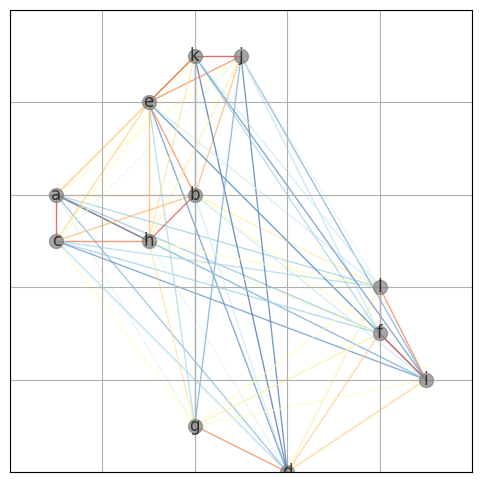

In [5]:
# 可视化图
fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G, pos, with_labels=True, 
                 labels=labels, 
                 node_size=100, 
                 node_color='grey', 
                 font_color='black', 
                 edge_vmin = 0, edge_vmax = 10,
                 edge_cmap=plt.cm.RdYlBu,
                 edge_color=edge_weights,
                 width=1, alpha=0.7)

# nx.draw_networkx_edge_labels(G, pos, 
#                              edge_labels=edge_labels, 
#                              font_color='k')

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.savefig('成对距离矩阵_无向图.svg')
plt.show()


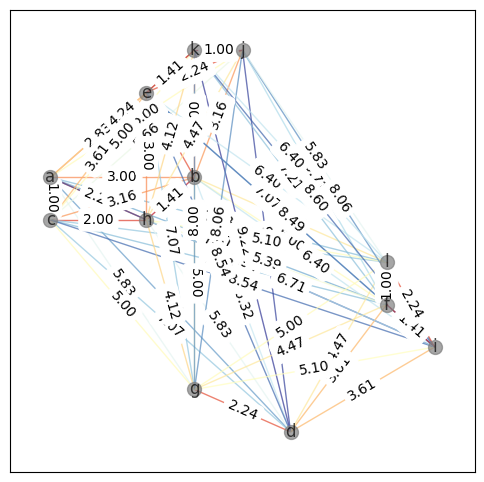

In [6]:
# 可视化图
plt.figure(figsize=(6,6))
nx.draw_networkx(G, pos, with_labels=True, 
                 labels=labels, 
                 node_size=100, 
                 node_color='grey', 
                 font_color='black', 
                 edge_cmap=plt.cm.RdYlBu,
                 edge_color=edge_weights,
                 width=1, alpha=0.7)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=edge_labels, 
                             font_color='k')

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()